In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json

In [2]:
file = 'brasileirao20032019.json'                                     #Nome do Json

with open(file) as train_file:
    dict_train = json.load(train_file)                                #Coloca o Json como Dicionário
    
brasil = pd.DataFrame.from_dict(json_normalize(dict_train))           #json_normalize arruma o json pro df
#train.reset_index(level=0, inplace=True)

brasil.drop('league_name', axis=1, inplace=True)                      #Vem uma uma coluna e linha a mais
brasil.drop(brasil.index[0], inplace=True)

brasil['country'] = 'Brazil'                                          #Adicionamos a coluna do País para depois

In [3]:
#Fazemos o mesmo para as outras Ligas
#Campeonato Alemao

file = 'alemao19992019.json'               

with open(file) as train_file:
    dict_train = json.load(train_file)                      
    
germany = pd.DataFrame.from_dict(json_normalize(dict_train))            
#train.reset_index(level=0, inplace=True)

germany.drop('league_name', axis=1, inplace=True)                     
germany.drop(germany.index[0], inplace=True)

germany['country'] = 'Germany'                                         

In [4]:
#Campeonato Italiano

file = 'calcio20002019.json'               

with open(file) as train_file:
    dict_train = json.load(train_file)                      
    
italia = pd.DataFrame.from_dict(json_normalize(dict_train))            
#train.reset_index(level=0, inplace=True)

italia.drop('league_name', axis=1, inplace=True)                     
italia.drop(italia.index[0], inplace=True)

italia['country'] = 'Italy'  

In [5]:
#Campeonato Frances

file = 'frances19992019.json'               

with open(file) as train_file:
    dict_train = json.load(train_file)                      
    
frances = pd.DataFrame.from_dict(json_normalize(dict_train))            
#train.reset_index(level=0, inplace=True)

frances.drop('league_name', axis=1, inplace=True)                     
frances.drop(frances.index[0], inplace=True)

frances['country'] = 'France'  

In [6]:
#Campeonato Portugues

file = 'portugal19992019.json'               

with open(file) as train_file:
    dict_train = json.load(train_file)                      
    
portugues = pd.DataFrame.from_dict(json_normalize(dict_train))            
#train.reset_index(level=0, inplace=True)

portugues.drop('league_name', axis=1, inplace=True)                     
portugues.drop(portugues.index[0], inplace=True)

portugues['country'] = 'Portugal'  

In [7]:
#Campeonato Ingles

file = 'premier19992019.json'               

with open(file) as train_file:
    dict_train = json.load(train_file)                      
    
ingles = pd.DataFrame.from_dict(json_normalize(dict_train))            
#train.reset_index(level=0, inplace=True)

ingles.drop('league_name', axis=1, inplace=True)                     
ingles.drop(ingles.index[0], inplace=True)

ingles['country'] = 'England'  

In [8]:
#juntando todos os dataframes

frames = [brasil, ingles, portugues, italia, germany, frances]

df = pd.concat(frames)

df.shape

(40599, 8)

In [9]:
df.head()

#Precisamos limpar os dados, começando pelo nome das colunas (retirar o partida.)
#Vamos também tirar o Rodada e deixar apenas o numero da rodada
#Retirar os parenteses de todas as colunas quem tem (score, time, teams)
#Separar o half_time_score em half_time_score_home e half_time_score_away
#Separar os times em home_team e away_team

,partida.half_time_score,partida.match_round,partida.match_time,partida.match_year,partida.team1_score,partida.team2_score,partida.teams,country
1,[(1 - 0)],46Rodada,[18:00],2003,[2],[0],"[Coritiba, Criciuma]",Brazil
2,[(1 - 0)],46Rodada,[18:00],2003,[2],[0],"[Figueirense, Guarani]",Brazil
3,[(2 - 0)],46Rodada,[18:00],2003,[2],[0],"[Parana, Vitoria]",Brazil
4,[(1 - 0)],46Rodada,[18:00],2003,[5],[0],"[Sao Caetano, Internacional]",Brazil
5,[(1 - 1)],46Rodada,[18:10],2003,[3],[2],"[Atletico MG, Goias]",Brazil


In [10]:
#Renomeando

df = df.rename(columns = {
                        'partida.match_round': 'round',
                        'partida.match_time': 'time',
                        'partida.match_year': 'year',
                        'partida.team1_score': 'home_score',
                        'partida.team2_score': 'away_score',
                        'partida.half_time_score': 'half_time_score',
                        'partida.teams': 'teams'
                        })

df.head()

,half_time_score,round,time,year,home_score,away_score,teams,country
1,[(1 - 0)],46Rodada,[18:00],2003,[2],[0],"[Coritiba, Criciuma]",Brazil
2,[(1 - 0)],46Rodada,[18:00],2003,[2],[0],"[Figueirense, Guarani]",Brazil
3,[(2 - 0)],46Rodada,[18:00],2003,[2],[0],"[Parana, Vitoria]",Brazil
4,[(1 - 0)],46Rodada,[18:00],2003,[5],[0],"[Sao Caetano, Internacional]",Brazil
5,[(1 - 1)],46Rodada,[18:10],2003,[3],[2],"[Atletico MG, Goias]",Brazil


In [11]:
#Separando o Placar de intervalo
import re

df['half_time_score'] =  [re.sub(r'[^\d+]','', str(x)) for x in df['half_time_score']]
df['half_time_away_score'] = df['half_time_score'].str.split('').str[2]
df['half_time_home_score'] = df['half_time_score'].str.split('').str[1]

df.drop('half_time_score', axis=1, inplace=True)

df.head()

,round,time,year,home_score,away_score,teams,country,half_time_away_score,half_time_home_score
1,46Rodada,[18:00],2003,[2],[0],"[Coritiba, Criciuma]",Brazil,0,1
2,46Rodada,[18:00],2003,[2],[0],"[Figueirense, Guarani]",Brazil,0,1
3,46Rodada,[18:00],2003,[2],[0],"[Parana, Vitoria]",Brazil,0,2
4,46Rodada,[18:00],2003,[5],[0],"[Sao Caetano, Internacional]",Brazil,0,1
5,46Rodada,[18:10],2003,[3],[2],"[Atletico MG, Goias]",Brazil,1,1


In [12]:
#Pegando a penas o numero da rodada
df['round'] =  [re.sub(r'[^\d+]','', str(x)) for x in df['round']]

df.head()

,round,time,year,home_score,away_score,teams,country,half_time_away_score,half_time_home_score
1,46,[18:00],2003,[2],[0],"[Coritiba, Criciuma]",Brazil,0,1
2,46,[18:00],2003,[2],[0],"[Figueirense, Guarani]",Brazil,0,1
3,46,[18:00],2003,[2],[0],"[Parana, Vitoria]",Brazil,0,2
4,46,[18:00],2003,[5],[0],"[Sao Caetano, Internacional]",Brazil,0,1
5,46,[18:10],2003,[3],[2],"[Atletico MG, Goias]",Brazil,1,1


In [13]:
#O horário do jogo é irrelevante

df.drop('time', axis=1, inplace=True)

df.head()

,round,year,home_score,away_score,teams,country,half_time_away_score,half_time_home_score
1,46,2003,[2],[0],"[Coritiba, Criciuma]",Brazil,0,1
2,46,2003,[2],[0],"[Figueirense, Guarani]",Brazil,0,1
3,46,2003,[2],[0],"[Parana, Vitoria]",Brazil,0,2
4,46,2003,[5],[0],"[Sao Caetano, Internacional]",Brazil,0,1
5,46,2003,[3],[2],"[Atletico MG, Goias]",Brazil,1,1


In [14]:
#Retirando as chaves de home_score e away_score

df['home_score'] =  [re.sub(r'[^\d+]','', str(x)) for x in df['home_score']]
df['away_score'] =  [re.sub(r'[^\d+]','', str(x)) for x in df['away_score']]

df.head()

,round,year,home_score,away_score,teams,country,half_time_away_score,half_time_home_score
1,46,2003,2,0,"[Coritiba, Criciuma]",Brazil,0,1
2,46,2003,2,0,"[Figueirense, Guarani]",Brazil,0,1
3,46,2003,2,0,"[Parana, Vitoria]",Brazil,0,2
4,46,2003,5,0,"[Sao Caetano, Internacional]",Brazil,0,1
5,46,2003,3,2,"[Atletico MG, Goias]",Brazil,1,1


In [15]:
#Separando os Times

df['home_team'] = df['teams'].str[0]
df['away_team'] = df['teams'].str[1]

df.drop('teams', axis=1, inplace=True)

df.head()

,round,year,home_score,away_score,country,half_time_away_score,half_time_home_score,home_team,away_team
1,46,2003,2,0,Brazil,0,1,Coritiba,Criciuma
2,46,2003,2,0,Brazil,0,1,Figueirense,Guarani
3,46,2003,2,0,Brazil,0,2,Parana,Vitoria
4,46,2003,5,0,Brazil,0,1,Sao Caetano,Internacional
5,46,2003,3,2,Brazil,1,1,Atletico MG,Goias


In [16]:
#Mudando a ordem das colunas para melhor visualizacao

df = df[['country', 'year', 'round', 'home_team', 'away_team', 'home_score', 'away_score', 'half_time_home_score', 'half_time_away_score']]

df.head()

,country,year,round,home_team,away_team,home_score,away_score,half_time_home_score,half_time_away_score
1,Brazil,2003,46,Coritiba,Criciuma,2,0,1,0
2,Brazil,2003,46,Figueirense,Guarani,2,0,1,0
3,Brazil,2003,46,Parana,Vitoria,2,0,2,0
4,Brazil,2003,46,Sao Caetano,Internacional,5,0,1,0
5,Brazil,2003,46,Atletico MG,Goias,3,2,1,1


In [17]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33274 entries, 1 to 7251
Data columns (total 9 columns):
country                 33274 non-null object
year                    33274 non-null object
round                   33274 non-null object
home_team               33274 non-null object
away_team               33274 non-null object
home_score              33274 non-null object
away_score              33274 non-null object
half_time_home_score    33274 non-null object
half_time_away_score    33274 non-null object
dtypes: object(9)
memory usage: 2.5+ MB


In [18]:
#Converter as colunas para int, para poder somar

df['home_score'] = df['home_score'].astype(int)
df['away_score'] = df['away_score'].astype(int)
df['half_time_home_score'] = df['half_time_home_score'].astype(int)
df['half_time_away_score'] = df['half_time_away_score'].astype(int)

In [19]:
#Quem ganha mais partidas? em casa ou fora de casa?

total = 0
win = 0
draw = 0
lose = 0

for index, row in df.iterrows():
    if row['home_score'] > row['away_score']:
        win += 1
        
    elif row['home_score'] == row['away_score']:
        draw += 1
        
    else:
        lose += 1
    
    total += 1
        
print("Porcentagem de vitorias do time da casa: ", (win/total) * 100)
print("Porcentagem de empates do time da casa: ", (draw/total) * 100)
print("Porcentagem de derrotas do time da casa: ", (lose/total) * 100)

Porcentagem de vitorias do time da casa:  46.820340205565905
Porcentagem de empates do time da casa:  26.83777123279437
Porcentagem de derrotas do time da casa:  26.34188856163972


In [20]:
#Estatisticas de um time em especifico
def team_statistics(team):
    home_total = 0                      #Os times não tem a mesma quantidade de jogos (pode ter caido etc)
    home_win = 0
    home_draw = 0
    home_lose = 0
    
    away_total = 0                      
    away_win = 0
    away_draw = 0
    away_lose = 0
    
    virada_casa = 0
    jogos_perdendo_casa = 0
    
    virada_fora = 0
    jogos_perdendo_fora = 0
    
    for index, row in df.iterrows():
        if team != row['home_team'] and team != row['away_team']:
            continue
        
        if team == row['home_team']:            
            if row['home_score'] > row['away_score']:
                home_win += 1

            elif row['home_score'] == row['away_score']:
                home_draw += 1

            else:
                home_lose += 1
                
            home_total += 1
            
            if row['half_time_home_score'] < row['half_time_away_score']:
                jogos_perdendo_casa += 1
                
                if row['home_score'] > row['away_score']:
                    virada_casa += 1
        
        if team == row['away_team']:            
            if row['home_score'] > row['away_score']:
                away_win += 1

            elif row['home_score'] == row['away_score']:
                away_draw += 1

            else:
                away_lose += 1

            away_total += 1
            
            if row['half_time_home_score'] > row['half_time_away_score']:
                jogos_perdendo_fora += 1
                
                if row['home_score'] < row['away_score']:
                    virada_fora += 1
    
    print("---------------", team, "-------------------")
    print("Taxa de vitorias em casa: ", (home_win/home_total) * 100)
    print("Taxa de empates em casa: ", (home_draw/home_total) * 100)
    print("Taxa de derrotas em casa: ", (home_lose/home_total) * 100)
    print("Taxa de vitorias fora de casa: ", (away_win/away_total) * 100)
    print("Taxa de empates fora de casa: ", (away_draw/away_total) * 100)
    print("Taxa de derrotas fora de casa: ", (away_lose/away_total) * 100)
    
    #Gols sofridos/feitos mas feito com a função .sum dos dataframes
    print("Gols feitos em casa: ", df.loc[df['home_team'] == team, 'home_score'].sum())
    print("Gols sofridos em casa: ", df.loc[df['home_team'] == team, 'away_score'].sum())
    print("Gols feitos fora de casa: ", df.loc[df['away_team'] == team, 'away_score'].sum())
    print("Gols sofridos fora de casa: ", df.loc[df['away_team'] == team, 'home_score'].sum())
    
    #Taxa de viradas do time (terminar o primeiro tempo [half time] perdendo e terminar o jogo ganhando)
    print("Taxa de viradas em casa: ", (virada_casa/jogos_perdendo_casa) * 100)
    print("Taxa de viradas fora de casa: ", (virada_fora/jogos_perdendo_fora) * 100)
    
    #Media de gols
    print("Media de gols feitos em casa: ", df.loc[df['home_team'] == team, 'home_score'].mean())
    print("Media de gols sofridos em casa: ", df.loc[df['home_team'] == team, 'away_score'].mean())
    print("Media de gols feitos fora de casa: ", df.loc[df['away_team'] == team, 'away_score'].mean())
    print("Media de gols sofridos em casa: ", df.loc[df['away_team'] == team, 'home_score'].mean())

In [21]:
print(team_statistics("Flamengo"))

--------------- Flamengo -------------------
Taxa de vitorias em casa:  52.94117647058824
Taxa de empates em casa:  27.86377708978328
Taxa de derrotas em casa:  19.195046439628484
Taxa de vitorias fora de casa:  43.07692307692308
Taxa de empates fora de casa:  29.230769230769234
Taxa de derrotas fora de casa:  27.692307692307693
Gols feitos em casa:  521
Gols sofridos em casa:  304
Gols feitos fora de casa:  353
Gols sofridos fora de casa:  475
Taxa de viradas em casa:  16.363636363636363
Taxa de viradas fora de casa:  2.7522935779816518
Media de gols feitos em casa:  1.6130030959752322
Media de gols sofridos em casa:  0.9411764705882353
Media de gols feitos fora de casa:  1.0861538461538462
Media de gols sofridos em casa:  1.4615384615384615
None


In [22]:
import matplotlib.pyplot as plt

def team_history(team):
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1)
    
    #Definindo os pontos
    win = 3
    draw = 1
    lose = 0
    
    #Pegamos os valores diferentes dos anos
    years = list(df.year.unique())
    
    colors = {1:'g', 2:'b', 3:'r', 4:'c', 5:'m', 6:'y', 7:'k', 8:'w', 9:'#eeefff', 10:'#000000', 11:'#837B7A',
              12:'#355D39', 13:'#77067C', 14:'#E951F0', 15: '#C10647', 16:'#8C8B3F', 17: '#D17301', 18: '#17DEE1',
              20:'#4517E1'}
    i = 1
    
    for year in years:
        #Usando iloc agora
        #year = loop entre todos
        #country = brasil
        #O time tem que ter o time que passamos no home_team ou away_team
        db = df.loc[(df['year'] == year) & (df['country'] == 'Brazil') & ((df['home_team'] == team) | (df['away_team'] == team))]
    
        data = []
        data.append(0)
        
        if '/' in year:
            continue
    
        i += 1
    
        for index, row in db.iterrows():

            if team != row['home_team'] and team != row['away_team']:
                continue

            if team == row['home_team']:            
                if row['home_score'] > row['away_score']:
                    data.append(data[-1] + win)

                elif row['home_score'] == row['away_score']:
                    data.append(data[-1] + draw)

                else:
                    data.append(data[-1] + lose)

            elif team == row['away_team']:            
                if row['home_score'] < row['away_score']:
                    data.append(data[-1] + win)

                elif row['home_score'] == row['away_score']:
                    data.append(data[-1] + draw)

                else:
                    data.append(data[-1] + lose)

        ax.plot(data, linestyle='dashed', color=colors[i], marker='o',  label=year)
        
    ax.legend(loc='best')

None


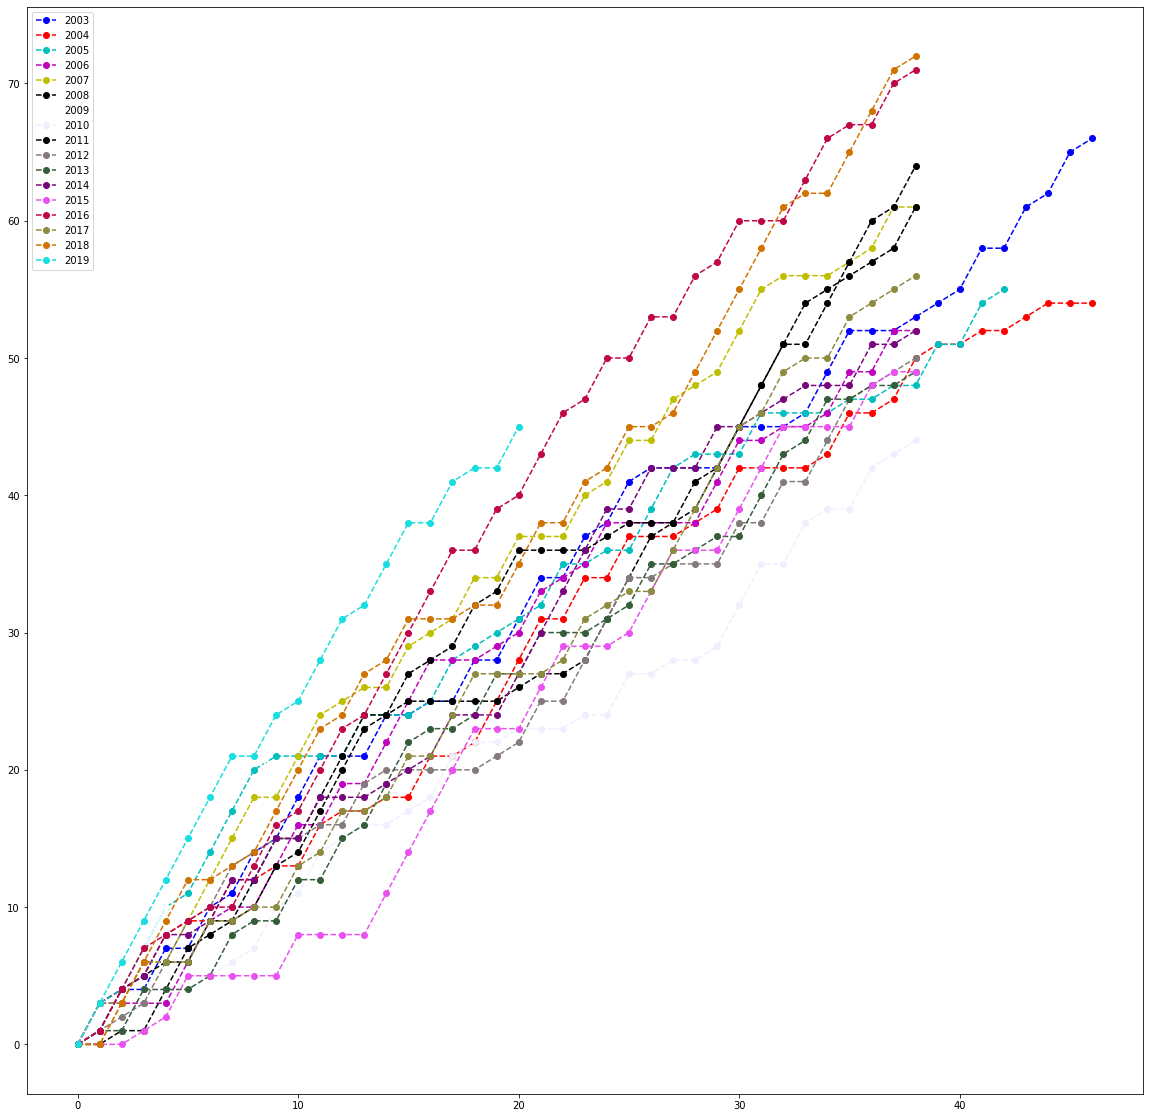

In [23]:
print(team_history("Flamengo"))

In [24]:
#A partir daqui é aprendizado de máquina

#Utilizaremos o algoritmo k means para ver se o time ganhará ou não um jogo

#Primeiro precisamos fazer algumas transformações:
    #Transformar home_score e away_score em vitoria/empate/derrota -> 2/1/0
    #Retirar half_time_home_score, half_time_away_score e pais pois não fazem sentido para isso

#Deixaremos Rodada e ano pois o ano e a rodada influencia no "momento" do time
#Por mais que poderemos pedir para calcular timer de diferentes ligas, seria como:
    #Quem ganharia um jogo entre o time X e o time Y pela tal rodada e em qual ano?

In [26]:
df.head()

,country,year,round,home_team,away_team,home_score,away_score,half_time_home_score,half_time_away_score
1,Brazil,2003,46,Coritiba,Criciuma,2,0,1,0
2,Brazil,2003,46,Figueirense,Guarani,2,0,1,0
3,Brazil,2003,46,Parana,Vitoria,2,0,2,0
4,Brazil,2003,46,Sao Caetano,Internacional,5,0,1,0
5,Brazil,2003,46,Atletico MG,Goias,3,2,1,1


In [27]:
df.drop('half_time_home_score', axis=1, inplace=True)
df.drop('half_time_away_score', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)

df.head()

,year,round,home_team,away_team,home_score,away_score
1,2003,46,Coritiba,Criciuma,2,0
2,2003,46,Figueirense,Guarani,2,0
3,2003,46,Parana,Vitoria,2,0
4,2003,46,Sao Caetano,Internacional,5,0
5,2003,46,Atletico MG,Goias,3,2


In [28]:
#Na europa, a temporada é da seguinte forma: 2000/2001, então selecionaremos apenas o primeiro ano

df['year'] = df['year'].str.split('/').str[0]

df.head()

,year,round,home_team,away_team,home_score,away_score
1,2003,46,Coritiba,Criciuma,2,0
2,2003,46,Figueirense,Guarani,2,0
3,2003,46,Parana,Vitoria,2,0
4,2003,46,Sao Caetano,Internacional,5,0
5,2003,46,Atletico MG,Goias,3,2


In [29]:
#Criaremos a nova coluna de vitoria/empate/derrota 2/1/0

df.loc[df['home_score'] > df['away_score'], 'result'] = 2
df.loc[df['home_score'] == df['away_score'], 'result'] = 1
df.loc[df['home_score'] < df['away_score'], 'result'] = 0

df.drop('home_score', axis=1, inplace=True)
df.drop('away_score', axis=1, inplace=True)

df.head()

,year,round,home_team,away_team,result
1,2003,46,Coritiba,Criciuma,2.0
2,2003,46,Figueirense,Guarani,2.0
3,2003,46,Parana,Vitoria,2.0
4,2003,46,Sao Caetano,Internacional,2.0
5,2003,46,Atletico MG,Goias,2.0


In [30]:
#Converter o ano e a rodada para numero

df['year'] = df['year'].astype(int)
df['round'] = df['round'].astype(int)

In [31]:
import numpy as np

#Criando um dicionário dos times para poder substituir
team_dict = pd.Series(df.home_team.values).to_dict()

#Temos valores duplicados (Tal time aparece mais de uma vez na mesma coluna), precisamos limpar isso
resultado = []

for key, value in team_dict.items():
    if value not in resultado:
        resultado.append(value)

team_dict = pd.Series(resultado).to_dict()

#Team_dict é da forma {1: 'Flamengo'}, mas precisamos do inverso,
#ou seja: {'Flamengo': 1}

team_dict_inv = {v: k for k, v in team_dict.items()}

df = df.replace({"home_team": team_dict_inv})
df = df.replace({"away_team": team_dict_inv})

In [32]:
df.head()

,year,round,home_team,away_team,result
1,2003,46,0,13,2.0
2,2003,46,1,16,2.0
3,2003,46,2,19,2.0
4,2003,46,3,17,2.0
5,2003,46,4,15,2.0


In [33]:
team_dict_inv

{'Coritiba': 0,
 'Figueirense': 1,
 'Parana': 2,
 'Sao Caetano': 3,
 'Atletico MG': 4,
 'Paysandu': 5,
 'Gremio': 6,
 'Fluminense': 7,
 'Ponte Preta': 8,
 'Bahia': 9,
 'Sao Paulo': 10,
 'Vasco da Gama': 11,
 'Corinthians': 12,
 'Criciuma': 13,
 'Flamengo': 14,
 'Goias': 15,
 'Guarani': 16,
 'Internacional': 17,
 'Santos': 18,
 'Vitoria': 19,
 'Atletico PR': 20,
 'Juventude': 21,
 'Palmeiras': 22,
 'Cruzeiro': 23,
 'Botafogo': 24,
 'Fortaleza': 25,
 'Nautico': 26,
 'Sport': 27,
 'Gremio Prudente': 28,
 'Atletico GO': 29,
 'Avai': 30,
 'Portuguesa': 31,
 'Joinville': 32,
 'Chapecoense': 33,
 'Ceara': 34,
 'CS Alagoano': 35,
 'America MG': 36,
 'Santa Cruz': 37,
 'Santo Andre': 38,
 'Ipatinga': 39,
 'America RN': 40,
 'Brasiliense': 41,
 'West Ham': 42,
 'Coventry': 43,
 'Tottenham': 44,
 'Charlton': 45,
 'Newcastle': 46,
 'Derby': 47,
 'Southampton': 48,
 'Leeds': 49,
 'Everton': 50,
 'Manchester City': 51,
 'Blackburn': 52,
 'Manchester Utd': 53,
 'Chelsea': 54,
 'Bolton': 55,
 'Birming

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['home_team',  'year', 'away_team', 'round']

X = df[feature_cols]
label = df.result

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

predicted= model.predict([[14, 2018, 63, 15]]) #Flamengo, 2018, Liverpool, Rodada 15
print("Valor da predição:", predicted)

Accuracy: 0.46609235700691176
Valor da predição: [2.]


In [ ]:
#Valor 2, ou seja, o Flamengo ganharia do Liverpool